# 1　決定木回帰とランダムフォレスト

## A　決定木回帰の学習

この節の目標は、決定木回帰の学習の様子を理解することです。入力$X$に対して出力$y$が非線形な関係にある問題を準備し、決定木回帰にこれを学習させます。学習ののち、決定木回帰が入力$X$に対してどのような予測値$f(X)$を返すようになったのかを、入力と予測値のグラフを描くことで確認します。

#### データの生成
以下のような訓練データセットを準備します。
* 入力 $X_{train}$ : 区間$[0,1]$上に等間隔に配置された16個の値
* 出力 $y_{train}$ : $y_{train} = (X_{train} - 0.5)^2$

訓練データセットは入力と出力が2次関数の関係にあり、線形(1次式)な関係ではありません。このような問題を非線形な問題といいます。

In [1]:
# データを生成する。
import numpy as np
X_train = np.linspace(start = 0, stop = 1, num = 16)
y_train = (X_train - 0.5) ** 2

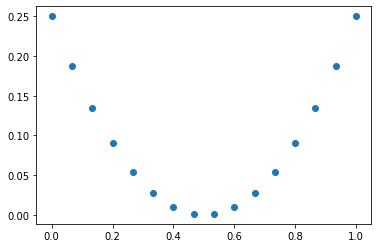

In [2]:
# X_trainとy_trainの散布図を描く。
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.show()

#### 決定木回帰のsckit-learnによる実装
scikit-learnモジュールには決定木回帰のクラス`DecisionTreeRegressor`が準備されています。今回はこれを用いて決定木回帰の学習を行いましょう。

決定木回帰は「葉ノードの最大数」というハイパーパラメータがあり、`DecisionTreeRegressor`でも`max_leaf_nodes`というインスタンス変数で指定することができます。今回はこの変数の値を5にしてインスタンスを立ててみましょう。

In [3]:
# 決定木回帰のインスタンスを立てる。
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_leaf_nodes = 5)

`fit`メソッドでは、このように各データポイントごとに1つのリストが充てがわれるように入力が準備されます。では早速、決定木回帰を学習させてみましょう。

In [4]:
X_train = X_train.reshape(16, 1) # fitメソッドに渡すための整形
DTR.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=5)

#### 決定木回帰の学習結果の確認
決定木回帰の学習の結果を確認するために、入力$X_{test}$として区間$[0,1]$上に100個の点を等間隔に生成し、学習済みの決定木回帰がこれらの入力に対して与える予測値$f(X_{test})$を計算します。さらに、入力$X$と予測値$f(X_{test})$関係を先ほどの散布図上に描画しましょう。

決定木回帰の予測値の計算は`predict`メソッドで実行できます。

In [5]:
# 予測値を計算するための入力を生成
X_test = np.linspace(0, 1, 100)

In [6]:
# predictメソッドに渡すために整形する。
X_test = X_test.reshape(100, 1)

In [7]:
# 予測値を計算する。
y_pred = DTR.predict(X_test)

入力と予測値の関係を散布図で表現しましょう。

In [8]:
# matplotlib.pyplot.scatterのために入力を整形する。
X_train = X_train.reshape(16)
X_test = X_test.reshape(100)

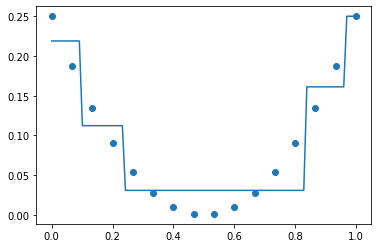

In [9]:
# 入力と出力、予測値を散布図に図示する。
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred)
plt.show()

#### 決定木回帰の学習の数理
これまでの結果を参考に、決定木回帰の学習の数学的な部分を説明しましょう。決定木回帰は入力$X$に対する予測$f(X)$を**階段関数**で与えるような学習器です。階段関数とは、区分的に定数関数になっているような関数になっているようなものです。入力空間をいくつかの領域に分割して、その領域ごとに一定の予測値が充てがわれています。

入力空間をどれくらい細かく分割するかを決めているのが**葉ノードの最大数**です。先ほどの例では、葉ノードの最大数が5だったので、入力空間もまた5つに分割されています。
* $X < 0.1$
* $0.1 < X < 0.2$
* $0.2< X < 0.8$
* $0.8 < X < 0.9$
* $0.9 < X$

決定木回帰の学習では、訓練データでの平均2乗誤差が最小になるように入力空間の分割領域とその領域における予測値を決定しています(問3参照)。ここで、入力空間の分割領域はその領域の数が葉ノードの最大数を超えない範囲で求めます。

要するに決定木回帰は、仮説を階段関数、損失を平均２乗誤差、罰則を葉ノードの数であるような学習アルゴリズムです。

#### 演習問題
**問1**. 上記の例で、決定木回帰の最大葉ノード数を16にしたとき、入力$X$に対する予測値$f(X)$のグラフはどのような折れ線グラフになるだろうか。

(1) 学習の結果として得られるグラフを考え、手書きで描いてみましょう。

(2) (1)の結果が正しいを確認するために、上記に倣ってPythonでグラフを描いてみましょう。
> Hint. `DecisionTreeRegressor`クラスのインスタンス変数`max_leaf_nodes`に16を渡せばよい。

(3) (2)で確認されるような現象を何というか答えてください。

**問2**. 以下のようなデータセットを、最大葉ノード数が2の決定木回帰に学習させる。このとき、入力$X$に対する予測値$f(X)$のグラフはどのような折れ線グラフになるだろうか。手書きで答えてください。

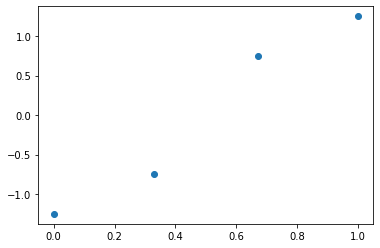

In [10]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([0, 0.33, 0.67, 1.00])
y_train = np.array([-1.25, -0.75, 0.75, 1.25])

plt.scatter(X_train, y_train)
plt.show()

**問3**. データ$y_1,..., y_n$に対して、平均２乗誤差を最小にするような予測値は**$y$の標本平均**であることを証明してください。
> 要は、決定木回帰の分割領域に充てがわれる予測値は、分割領域に存在しているデータポイントの出力の値$y$の標本平均になるということです。

## B　決定木回帰の性質
決定木回帰の学習には、
* 葉ノードの最大数を適切にコントロールしないと過剰適合する。
* 訓練データの変化が学習に大きな影響を与える。（データに対してロバストでない。）

という性質があることが知られています。1番目の性質は前節の問1で確認しました。この節では、2番目のデータに対してロバストでない性質を確認しましょう。

入力に対して出力が一意に決まらない（誤差がついている）ような回帰問題を考えます。データを発生させる確率分布は変えずに、訓練データだけを変えたとき、決定木回帰の入力に対する予測値のグラフがどれくらい変化するのかを見てみましょう。

#### データの生成
以下のような訓練データセットを準備します。
* 入力 $X_{train}$ : 区間$[0,1]$上に等間隔に配置された16個の値
* 出力 $y_{train}$ : $y_{train} = (X_{train} - 0.5)^2 + ε$

ここで、εは平均0, 標準偏差0.1の正規分布$N(0, 0.1^2)$に従って決まる確率変数とします。要はεは誤差です。

In [11]:
# データを生成する。
import numpy as np
X_train = np.linspace(start = 0, stop = 1, num = 16)
y_train = (X_train - 0.5) ** 2 + np.random.normal(loc = 0.0, scale = 0.1, size = 16)

ここで、`numpy.random.normal(loc, scale, size)`は平均loc, 標準偏差scaleの正規乱数をsize個生成し、numpy.arrayで返します。今回の場合、誤差εとして平均0, 標準偏差1の正規乱数16個を`np.random.normal(loc = 0.0, scale = 0.1, size = 16)`で生成します。

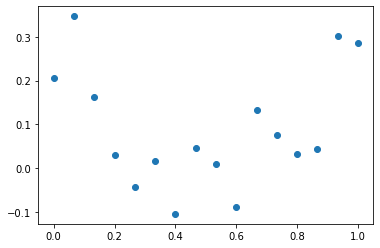

In [12]:
# X_trainとy_trainの散布図を描く。
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)
plt.show()

さて、この訓練データを決定木回帰に学習させ、学習の結果を入力に対する予測値のグラフで確認してみましょう。

In [13]:
# fitメソッドに渡すための整形
X_train = X_train.reshape(16, 1)

#### 決定木回帰の学習とその結果の確認

In [14]:
# 決定木回帰のインスタンスを立てる。
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_leaf_nodes = 5)
DTR.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=5)

In [15]:
# 予測値を計算するための入力を生成
X_test = np.linspace(0, 1, 100)

In [16]:
# predictメソッドに渡すために整形する。
X_test = X_test.reshape(100, 1)

In [17]:
# 予測値を計算する。
y_pred = DTR.predict(X_test)

In [18]:
# matplotlib.pyplot.scatterのために入力を整形する。
X_train = X_train.reshape(16)
X_test = X_test.reshape(100)

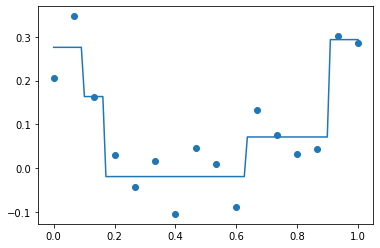

In [19]:
# 入力と出力、予測値を散布図に図示する。
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred)
plt.show()

#### 訓練データの変化が学習に及ぼす影響
さて、一連のスクリプトを繰り返し実行してみましょう。データを発生させる確率分布は変わらない一方、誤差εは取り替えられるので訓練データは変わります。このとき、入力$X$に対する予測値$f(X)$のグラフがどれくらい変わるかをチェックしてみましょう。

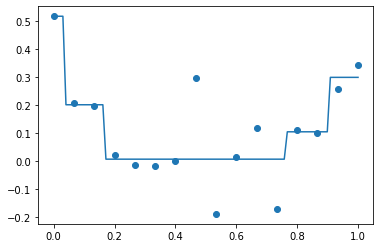

In [20]:
# 上の一連のスクリプトまとめ
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

X_train = np.linspace(start = 0, stop = 1, num = 16)
y_train = (X_train - 0.5) ** 2 + np.random.normal(loc = 0.0, scale = 0.1, size = 16)

X_train = X_train.reshape(16, 1)

DTR = DecisionTreeRegressor(max_leaf_nodes = 5)
DTR.fit(X_train, y_train)

X_test = np.linspace(0, 1, 100)
X_test = X_test.reshape(100, 1)
y_pred = DTR.predict(X_test)

X_train = X_train.reshape(16)
X_test = X_test.reshape(100)

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred)
plt.show()

決定木回帰のデータに対するロバスト性の欠如は、結果の再現性のなさを意味するため、決定木回帰を実際に運用する例は現在あまり見られません。しかし、この致命的に見える決定木回帰の性質は、**アンサンブル学習**という考え方によって脚光を浴びることになりました。

## C　多次元の入力に対する決定木回帰と分割領域
前節までは1次元の入力の場合に決定木回帰の学習を説明しました。多次元の入力の場合に、1次元の入力の場合と学習に大きな違いがあるわけではないですが、入力空間の分割領域に特徴的な性質が現れます。入力空間の分割領域の境界が、変数軸に対して必ず垂直に決定されるのです。

この節では、実際に多次元の入力に決定木回帰の学習を行うことで、分割領域の境界が変数軸に垂直に決まっている様子をチェックしましょう。また、この分割領域が**決定木**というif thenルールを決めることを確認しましょう。

#### データの生成
以下のような訓練データセットを準備します。
* 入力 $X_{train}$ : 区間$[-1,1]×[-1,1]$上に格子状に配置された9個の点
* 出力 $y_{train}$ : $y_{train} = X_{train}[:, 0]^2 + X_{train}[:, 1]^2$

出力は入力の第0変数の値と第1変数の値の2乗和で与えています。

In [21]:
# 訓練データの入力の生成
a = np.linspace(start = -1, stop = 1, num = 3)
b = np.linspace(start = -1, stop = 1, num = 3)
x0_train, x1_train = np.meshgrid(a, b)
X_train = np.c_[x0_train.ravel(), x1_train.ravel()]
X_train

array([[-1., -1.],
       [ 0., -1.],
       [ 1., -1.],
       [-1.,  0.],
       [ 0.,  0.],
       [ 1.,  0.],
       [-1.,  1.],
       [ 0.,  1.],
       [ 1.,  1.]])

In [22]:
# 訓練データの出力の生成
y_train = X_train[:, 0]**2 + X_train[:, 1]**2
y_train

array([2., 1., 2., 1., 0., 1., 2., 1., 2.])

2次元の入力空間を散布図で描画し、点の色で出力の値を表現しましょう。今回、紺は0, 緑は1, 黄は2の値を表しています。

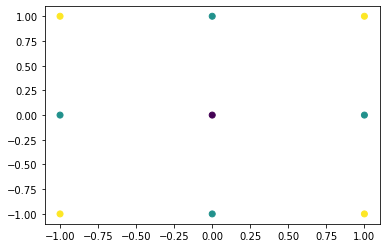

In [23]:
# 散布図上に入力と出力を図示する。
plt.scatter(x = X_train[:, 0], y = X_train[:, 1], c = y_train)
plt.show()

#### 決定木回帰の学習と分割領域の可視化

In [24]:
# 決定木回帰の学習
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_leaf_nodes = 5, random_state = 2)    # random_stateは学習の結果が都度変化しないようにするための乱数シード
DTR.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=5, random_state=2)

決定木回帰の学習の結果を確認するために、入力$X_{test}$として区間$[-1,1]×[-1,1]$上に10000個の点を格子状に生成し、学習済みの決定木回帰がこれらの入力に対して与える予測値$f(X_{test})$を計算します。さらに、入力$X$と予測値$f(X_{test})$関係を先ほどの散布図上に描画しましょう。

In [25]:
# テストデータの入力の生成
c = np.linspace(start = -1, stop = 1, num = 100)
d = np.linspace(start = -1, stop = 1, num = 100)
x0_test, x1_test = np.meshgrid(c, d)
X_test = np.c_[x0_test.ravel(), x1_test.ravel()]
X_test

array([[-1.        , -1.        ],
       [-0.97979798, -1.        ],
       [-0.95959596, -1.        ],
       ...,
       [ 0.95959596,  1.        ],
       [ 0.97979798,  1.        ],
       [ 1.        ,  1.        ]])

In [26]:
# テストデータの入力に対する決定木回帰の予測値の計算
y_pred = DTR.predict(X_test)
y_pred

array([1.66666667, 1.66666667, 1.66666667, ..., 1.66666667, 1.66666667,
       1.66666667])

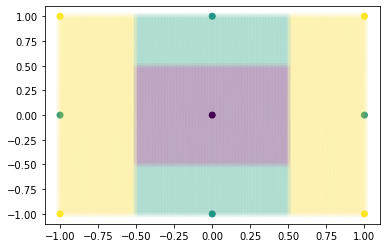

In [27]:
# 学習の結果の可視化と入力空間の分割領域
plt.scatter(x = X_train[:, 0], y = X_train[:, 1], c = y_train)
plt.scatter(x = X_test[:, 0], y = X_test[:, 1], c = y_pred, alpha = 0.05)
plt.show()

この図から見て取れるように、決定木回帰は多次元の入力空間に対して分割領域の境界を必ず変数軸に垂直に決定することが分かりました。この性質は、次に説明するように決定木というif-thenルールとの対応を与えます。

#### 決定木
先ほど描画した入力空間の分割領域は、以下のようにif-thenルールとして書き下すことが可能です(問1参照)。このようなif-thenルールを**決定木**といいます。決定木回帰は予測値を決めるような決定木を学習する機械学習モデルであるところから、その名前で呼ばれるようになりました。
<center><img src="./imgs/decision_tree.png" width = "250px"></center>

決定木の四角の部分は**ノード**、特に予測値が描かれている四角は**葉ノード(終端ノード)**と呼ばれています。各ノードには入力空間の分割規則が、特に葉ノードは各分割領域に宛がわれた予測値が示されています。`DecisionTreeRegressor`クラスのインスタンス変数`max_leaf_nodes`は、各分割領域が決定木の葉ノードに対応していることが名前の由来だったわけです。

#### 演習問題
**問1**. 上の例について、決定木から入力空間の分割領域を、入力空間を表す2次元の散布図上に手書きで復元してみてください。また入力空間の分割領域それぞれに、宛がわれている予測値を書き込んでください。
> もし余力があれば、第1節の演習問題(問3)を参考に、決定木の葉ノードに書かれた予測値を訓練データの出力の値から直接計算してみましょう。

## D　変数重要度
決定木回帰では、各変数が決定木の各ノードで領域を分割する軸として選択されたことにより、結果として平均2乗誤差をどれだけ減少させることに貢献したかを表す**変数重要度**という指標が定義されています。scikit-learnの`DecisionTreeRegressor`クラスでも、訓練データの学習ののちインスタンス変数`feature_importances_`にこの計算結果が代入されます。

In [28]:
DTR.feature_importances_

array([0.75, 0.25])

先ほどの2次元の入力の例の場合は、第0変数の変数重要度は0.75, 第1変数の変数重要度は0.25と計算されました。つまり今回の例の決定木回帰では、第1変数よりも第0変数のほうが予測値の決定に貢献しているであろうことが変数重要度から読み取れます。

決定木回帰は、訓練データへの過剰適合のしやすさやデータに対するロバスト性の欠如という欠点を持つ傍ら、決定木や変数重要度による**高い解釈可能性**をもつ手法として
* データマイニング
* 入力が高次元の場合の特徴量選択

を行ううえで、ヒントを得るための布石として大きな支持を得てきた歴史があります。このように決定木回帰の存在意義とも言える変数重要度について、この節では実際の定義とその計算を説明しましょう。

#### ノード1での平均2乗誤差の変化
変数重要度の定義・計算で最も重要な登場人物は、各ノードにおける平均2乗誤差の変化です。そのノードに対応する入力空間の分割について、その分割が行われる前と行われた後とで平均2乗誤差がどれだけ減少したかを計算します。

今回は試しに最初のノード（分割規則 : $X[:,0] < -0.5$）の場合に、平均2乗誤差の変化を計算してみましょう。まず、分割前の平均2乗誤差は
* 訓練データの出力の値とその予測値の差の2乗

の平均値です。第1節の演習問題(問3)で、予測値は分割領域に属するデータポイントの平均値で与えられることを示しました。今回、分割前は入力空間を分割していないので、予測値はデータポイント全体の出力の平均値になります。

In [29]:
node1_pre = np.mean((y_train - y_train.mean())**2)
node1_pre

0.4444444444444444

次に分割後の平均2乗誤差を計算します。分割後の平均2乗誤差は、
* ノードの左側に対応する分割領域の平均2乗誤差
* ノードの右側に対応する分割領域の平均2乗誤差

をそれぞれの分割領域に所属するデータポイントの割合(今回の場合、左側に対応する領域には3/9, 右側に対応する領域には6/9)で重み付き平均することで計算できます。

In [30]:
node1_left_y = np.array([1, 2, 2])    # ノードの左側に対応する分割領域に所属するデータポイントの出力の値
node1_right_y = np.array([0, 1, 1, 1, 2, 2])    # ノードの右側に対応する分割領域に所属するデータポイントの出力の値
node1_post = (3/9) * np.mean((node1_left_y - node1_left_y.mean())**2) + (6/9) * np.mean((node1_right_y - node1_right_y.mean())**2)
node1_post

0.3888888888888889

以上の計算からノード1における平均2乗誤差の変化は次のように算出されます。

In [31]:
node1_diff = node1_pre - node1_post
node1_diff

0.055555555555555525

#### 各ノードでの平均2乗誤差の変化
ノード1での平均2乗誤差の変化の計算を、他の分割規則を表すノードでも同様にやってみましょう。まず、分割規則 : $X[:,0] < 0.5$のノードの場合。

In [32]:
node2_pre = np.mean((node1_right_y - node1_right_y.mean())**2)
node2_left_y = np.array([0, 1, 1])
node2_right_y = np.array([1, 2, 2])
node2_post = (3/6) * np.mean((node2_left_y - node2_left_y.mean())**2) + (3/6) * np.mean((node2_right_y - node2_right_y.mean())**2)
node2_diff = node2_pre - node2_post
node2_diff

0.25000000000000006

次に、分割規則 : $X[:,1] < -0.5$のノードの場合。

In [33]:
node3_pre = np.mean((node2_left_y - node2_left_y.mean())**2)
node3_left_y = np.array([1])
node3_right_y = np.array([0, 1])
node3_post = (1/3) * np.mean((node3_left_y - node3_left_y.mean())**2) + (2/3) * np.mean((node3_right_y - node3_right_y.mean())**2)
node3_diff = node3_pre - node3_post
node3_diff

0.05555555555555558

最後に、分割規則 : $X[:,1] < 0.5$のノードの場合。

In [34]:
node4_pre = np.mean((node3_right_y - node3_right_y.mean())**2)
node4_left_y = np.array([0])
node4_right_y = np.array([1])
node4_post = (1/2) * np.mean((node4_left_y - node4_left_y.mean())**2) + (1/2) * np.mean((node4_right_y - node4_right_y.mean())**2)
node4_diff = node4_pre - node4_post
node4_diff

0.25

以上で全てのノードにおける平均2乗誤差の変化が出揃いました。

#### 変数重要度の算出
変数重要度は入力の各変数に対して、分割規則に採用されたノードでの平均2乗誤差の変化を、分割前の領域に存在するデータポイント数で重み付けした和をとることで計算されます。例えば、入力の第0変数は
* ノード1 : 分割前はデータポイント数9個
* ノード2 : 分割前はデータポイント数6個

の分割規則に採用された変数なので、その変数重要度は次のように計算されます。

In [35]:
X0_importance = 9 * node1_diff + 6 * node2_diff
X0_importance

2.0

同様に入力の第1変数の変数重要度も次のように計算されます。

In [36]:
X1_importance = 3 * node3_diff + 2 * node4_diff
X1_importance

0.6666666666666667

なお、scikit-learnの`DecisionTreeRegressor`クラスのインスタンス変数`feature_importances_`では変数重要度の総和を1に標準化する仕様になっています。結果として次のような計算を行えば、この節の最初に見た値を得ることが出来ます。

In [37]:
(X0_importance, X1_importance) / (X0_importance + X1_importance)

array([0.75, 0.25])